In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "data/raw/processed_images"

# Dimensions standardisées
img_height, img_width = 128, 128
batch_size = 32

# Générateurs d'images avec normalisation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=f"{dataset_path}/train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{dataset_path}/test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binaire
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\hiron\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import mlflow.keras, time
from tensorflow.keras.callbacks import TensorBoard

# set mlflow experiment
mlflow.set_experiment("cataract_classification")

# create a tensorboard callback
log_dir = f"logs/cnn_{int(time.time())}"
tensorboard_callback = TensorBoard(log_dir=log_dir)

with mlflow.start_run(run_name="CNN_Model_basic"):
    mlflow.keras.autolog()

    history = model.fit(
        train_generator,
        epochs=15,
        validation_data=test_generator,
        callbacks=[tensorboard_callback]
    )

    model.save("cataract_basic_classifier.h5")

2025/04/24 09:50:02 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/04/24 09:50:02 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
c:\Users\hiron\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 943ms/step - accuracy: 0.5357 - loss: 0.7724 - val_accuracy: 0.7521 - val_loss: 0.5676
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 785ms/step - accuracy: 0.7637 - loss: 0.5580 - val_accuracy: 0.8264 - val_loss: 0.4156
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 676ms/step - accuracy: 0.8383 - loss: 0.4069 - val_accuracy: 0.8760 - val_loss: 0.3482
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 767ms/step - accuracy: 0.8711 - loss: 0.3219 - val_accuracy: 0.8926 - val_loss: 0.3245
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 726ms/step - accuracy: 0.8846 - loss: 0.3139 - val_accuracy: 0.8182 - val_loss: 0.3772
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 741ms/step - accuracy: 0.9122 - loss: 0.2182 - val_accuracy: 0.8843 - val_loss: 0.3014
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 769ms/step - accuracy: 0.8909 - loss: 0.2256 - val_accuracy: 0.9174 - val_loss: 0.2894
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 796ms/step - accuracy: 0.9196 - loss: 0.2103 - val_accu

In [4]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.8924 - loss: 0.2803
Test Accuracy: 0.84


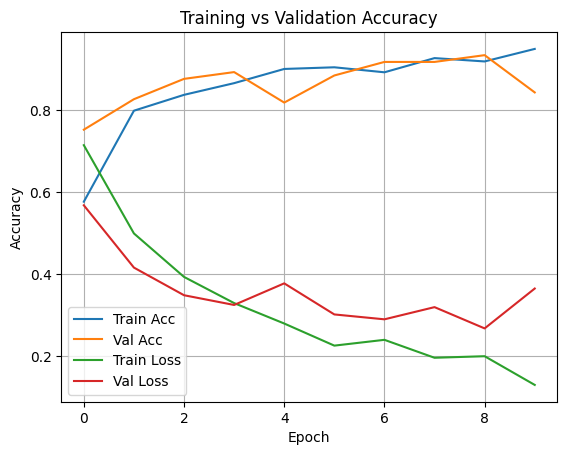

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()

ADDING DATA AUGMENTATION & DROPOUT

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train set avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test set juste normalisé
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=f"{dataset_path}/train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{dataset_path}/test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# model with dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # dropout here
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
with mlflow.start_run(run_name="CNN_Model_with_dropout"):
    mlflow.keras.autolog()

    history = model.fit(
        train_generator,
        epochs=15,
        validation_data=test_generator,
        callbacks=[tensorboard_callback]
    )

    model.save("cataract_classifier_with_dropout.h5")

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

2025/04/24 09:52:25 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/04/24 09:52:25 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 936ms/step - accuracy: 0.4735 - loss: 0.8681 - val_accuracy: 0.8264 - val_loss: 0.6403
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 888ms/step - accuracy: 0.6629 - loss: 0.6478 - val_accuracy: 0.8264 - val_loss: 0.4104
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 905ms/step - accuracy: 0.7513 - loss: 0.4985 - val_accuracy: 0.8347 - val_loss: 0.3943
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 800ms/step - accuracy: 0.7819 - loss: 0.4484 - val_accuracy: 0.7521 - val_loss: 0.5344
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 756ms/step - accuracy: 0.8319 - loss: 0.3551 - val_accuracy: 0.8760 - val_loss: 0.3812
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 759ms/step - accuracy: 0.8176 - loss: 0.3868 - val_accuracy: 0.8843 - val_loss: 0.3677
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 750ms/step - accuracy: 0.8443 - loss: 0.3565 - val_accuracy: 0.7769 - val_loss: 0.5296
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 842ms/step - accuracy: 0.8257 - loss: 0.4402 - val_accu

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 429ms/step - accuracy: 0.7858 - loss: 0.5327
Test Accuracy: 0.83


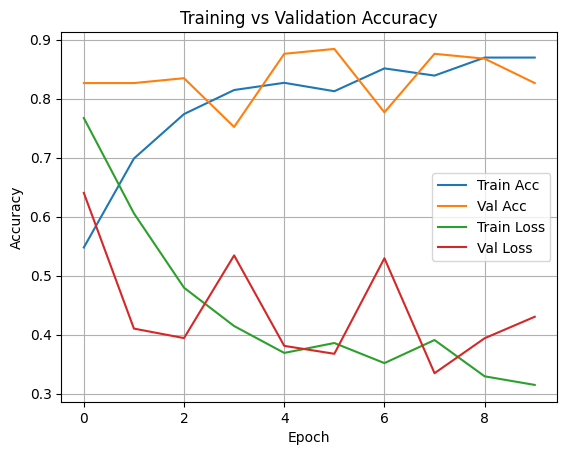

In [8]:

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()

MORE EPOCH + EARLY STOPPING

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss'),
    tensorboard_callback
]

with mlflow.start_run(run_name="CNN_Model_With_dropout_and_early_stop"):
    mlflow.keras.autolog()

    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=test_generator,
        callbacks=callbacks
    )

    model.save("cataract_classifier_with_dropout_and_early_stop.h5")

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()

2025/04/24 09:54:53 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/04/24 09:54:53 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.8737 - loss: 0.3111

16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 933ms/step - accuracy: 0.8728 - loss: 0.3136 - val_accuracy: 0.8926 - val_loss: 0.3329
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.8825 - loss: 0.3490

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 838ms/step - accuracy: 0.8813 - loss: 0.3502 - val_accuracy: 0.8678 - val_loss: 0.3118
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 828ms/step - accuracy: 0.8400 - loss: 0.3276 - val_accuracy: 0.8678 - val_loss: 0.3704
Epoch 4/30
10/16 ━━━━━━━━━━━━━━━━━━━━ 4s 675ms/step - accuracy: 0.8517 - loss: 0.3633